In [ ]:
# Thao tác xử lý dữ liệu cơ bản trong Pandas

# Bước 1: Thu thập dữ liệu

# Bước 2: Tiền xử lý dữ liệu

In [ ]:
# Tiền xử lý dữ liệu

  # 1. Làm sạch dữ liệu

    # Có dữ liệu

      # Dữ liệu đang không ở cấu trúc mong muốn -> chỉnh sửa cấu trúc -> bài trước

      # Dữ liệu đang không ở nội dung mong muốn -> chỉnh sửa nội dung -> bài trước

      # Outlier (giá trị ngoại lai) -> BUỔI HÔM NAY

        # Nhận dạng outlier

        # Xử lý outlier

    # Không có -> Thiếu dữ liệu (missing data)

      # Nhận dạng, tìm ra giá trị khuyết thuyết

      # Xử lý giá trị khuyết thiếu

        # 1. Bỏ đi

        # 2. Điền vào giá trị khuyết thiếu: 0, mean, median, mode, forward fill, backward fill, ...

        # 3. Để yên

  # 2. Chuẩn hoá dữ liệu

  # 3. Tách dữ liệu

# Set Up

In [ ]:
import pandas as pd
import numpy as np

# Xử lý dữ liệu khuyết thiếu (missing data)

In [ ]:
# bước 1: tìm ra giá trị khuyết thiếu
# bước 2: xử lý
  # cách 1: bỏ giá trị khuyết thiếu
  # cách 2: điền vào giá trị khuyết thiếu

## Kiểm tra xem có khuyết hay không

In [ ]:
s = pd.Series([5, 6, np.nan])

In [ ]:
s

0    5.0
1    6.0
2    NaN
dtype: float64

In [ ]:
# Kiểm tra phần tử nào bị khuyết
s.isna()

0    False
1    False
2     True
dtype: bool

In [ ]:
# ngược lại, kiểm tra phần tử nào không bị khuyết
# s.notna()

## Xử lý giá trị khuyết thiếu - Xoá giá trị thiếu

In [ ]:
s.dropna() #drop: bỏ, na -> dropna(): bỏ giá trị na

0    5.0
1    6.0
dtype: float64

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# xoá dòng mà có ít nhất 1 phần tử na
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [ ]:
# xoá cột có na
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [ ]:
# xoá dòng bị na, nhưng chỉ xoá những dòng mà toàn bộ giá trị trong dòng đó na
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# xoá dòng bị na, nhưng chỉ xoá những dòng mà có ít nhất 2 giá trị không bị na
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# xoá dòng bị na, nhưng chỉ xoá ở những cột xác định trước
# tuổi, giới tính, quê quán
df.dropna(subset=['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [ ]:
# Tóm lại, bỏ dữ liệu khuyết thiếu

# Ưu điểm:
  # dễ code
  # không làm sai dữ liệu

# Khuyết điểm:
  # 1. Bỏ đi nhiều quá
  # 2. Mất tính đại diện

# Khắc phục:
  # 1. Xoá, xoá có chọn lọc
  # 2. -> điền vào chỗ khuyết

# Code: .dropna(...)
  # bỏ cột mà dính na: axis=columns
  # bỏ dòng mà na hết: how='all'
  # giữ lại dòng có ít nhất 2 giá trị không bị na: thresh=2
  # có những cột tuyệt đối không được na: -> chỉ định cột: subset=[danh sách cột]
  # ... documentation của Pandas: dropna()

## Điền vào chỗ khuyết thiếu

In [ ]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list("ABCD"))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# Cách 1: điền = 0
df.fillna(0)

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [ ]:
# Cách 2: Điền bằng giá trị đằng trước hoặc đằng sau
df.fillna(method='bfill')

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# Cách 3: Điền bằng giá trị mang tính đại diện của cột dữ liệu
# 3.1: điền giá trị trung bình, trung vị, mode
df['A'].fillna(df['A'].median())

0    3.0
1    3.0
2    3.0
3    3.0
Name: A, dtype: float64

In [ ]:
# 3.2: dự đoán ô trống: interpolate() -> blackbox: linear, polynomial, ...
df['A'].interpolate()

0    NaN
1    3.0
2    3.0
3    3.0
Name: A, dtype: float64

In [ ]:
# Tổng kết: điền vào ô trống

# Ưu điểm:
 # không bị mất dữ liệu

# Khuyết điểm: vẫn có khả năng làm sai lệch dữ liệu
  # điền = 0
  # backward fill, forward fill
  # điền bằng một giá trị mang tính đại diện: mean, median, mode

# Code: fillna()

In [ ]:
# dropna() -> bỏ nhiều quá -> dữ liệu bị mất tính đại diện
# khi dữ liệu thiếu ít (<5%)

# fillna() -> làm sai dữ liệu
# khi dữ liệu có chuẩn nhất định
# -99

# nhóm dữ liệu: thu nhập
  # 0-10 triệu
  # 10-20 triệu
  # 20 triệu đổ lên
  # missing
  # -> phân tích riêng

# Xử lý giá trị ngoại lai

In [ ]:
# 3 cách phát hiện outliers
  # 1. xem bằng mắt
  # 2. bằng toán học
  # outlier: khác hẳn với phần còn lại: quá lớn, quá nhỏ
  # b1: tìm ra cái ngưỡng được coi là bình thường
    # Với dữ liệu cân (normal distribution, hình chuông) -> mean -> độ lệch chuẩn -> trong 3 độ lệch chuẩn
    # Với dữ liệu không cân -> median -> IQR -> trong 1.5*IQR
  # b2: tìm ra các giá trị nằm ngoài ngưỡng bình thường -> ngoại lai
    # với dữ liệu cân -> nằm ngoài 3 độ lệch chuẩn -> ngoại lai
      # nhỏ hơn mean - 3*std
      # lớn hơn mean + 3*std
    # với dữ liệu lệch (skewed) -> nằm ngoài 1.5 IQR -> ngoại lai
      # nhỏ hơn Q1 - 1.5*IQR
      # lớn hơn Q3 + 1.5*IQR

In [ ]:
boston_df = pd.read_csv('boston_house_prices.csv')
boston_df.columns = boston_df.iloc[0]
boston_df = boston_df[1:].reset_index(drop=True)
boston_df = boston_df.apply(pd.to_numeric)

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Cách 1: Xác định ngoại lại bằng phương pháp trực quan hoá

<Axes: >

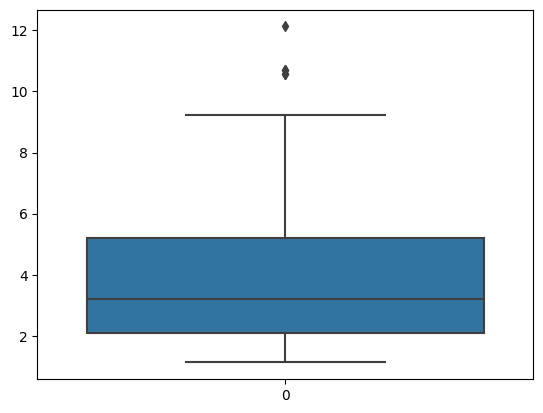

In [ ]:
import seaborn as sns  # import thư viện seaborn để vẽ biểu đồ
sns.boxplot(boston_df['DIS'])  # vẽ box plot cho dữ liệu ở cột CRIM

In [ ]:
# TIỀN XỬ LÝ DỮ LIỆU
# B0: KIỂM TRA XEM CÓ VẤN ĐỀ KHÔNG
  # isna() -> true -> xử lý
  # boxplot -> xử lý

## Cách 2: Xác định bằng phương pháp Z-Score

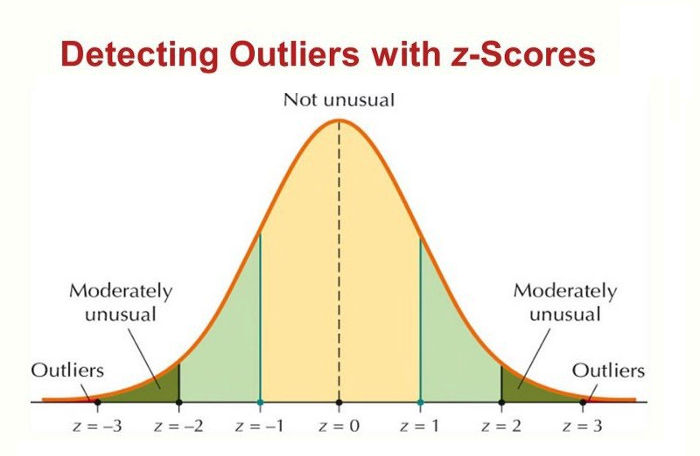

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

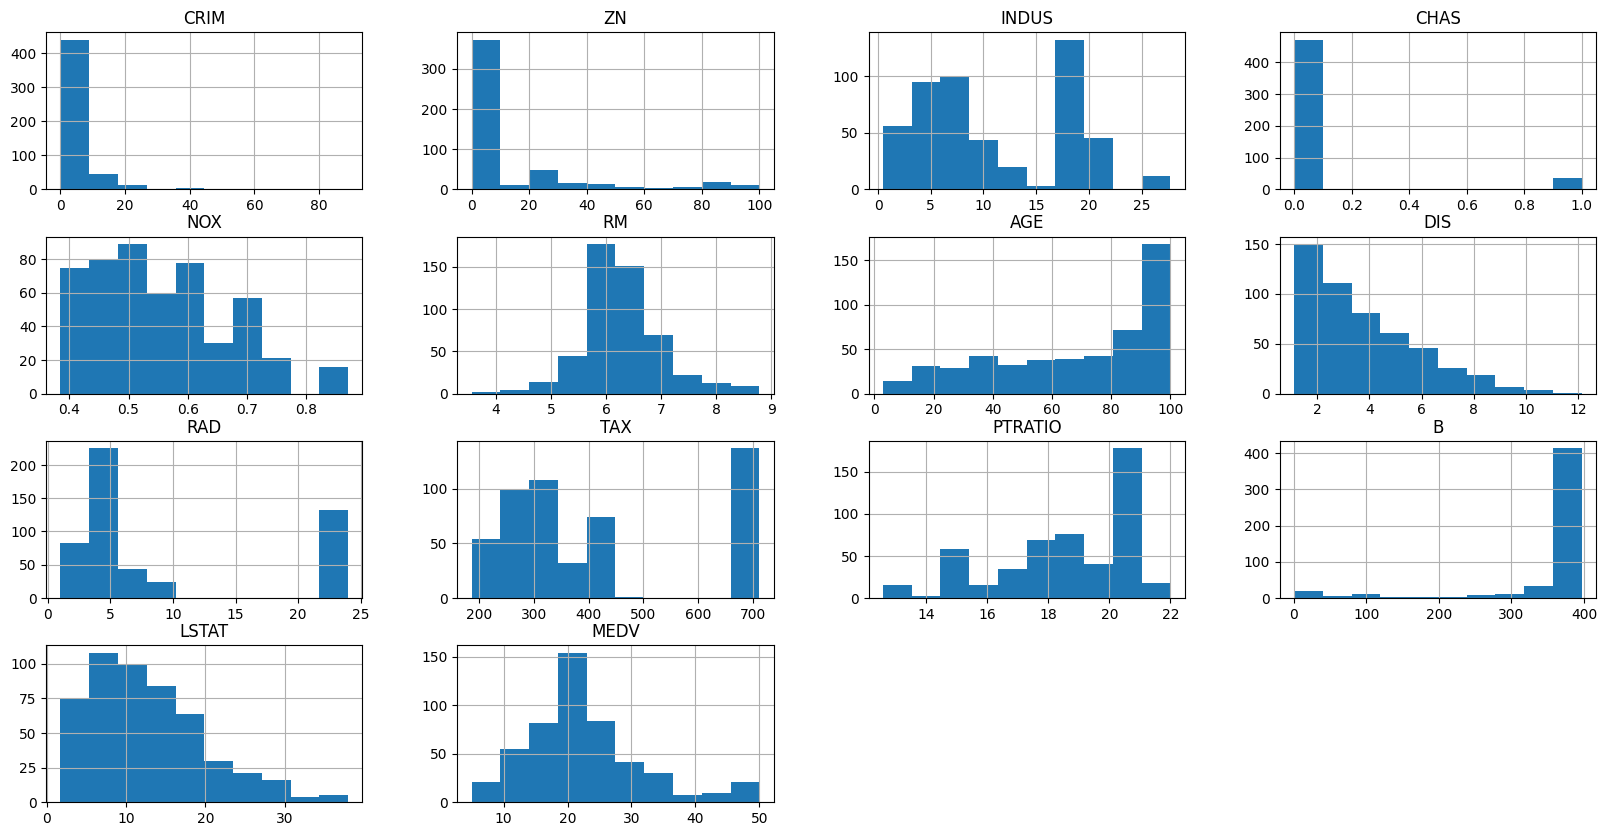

In [ ]:
# dùng histogram: biểu diễn phân bổ dữ liệu \
boston_df.hist(figsize=(20,10))

<Axes: >

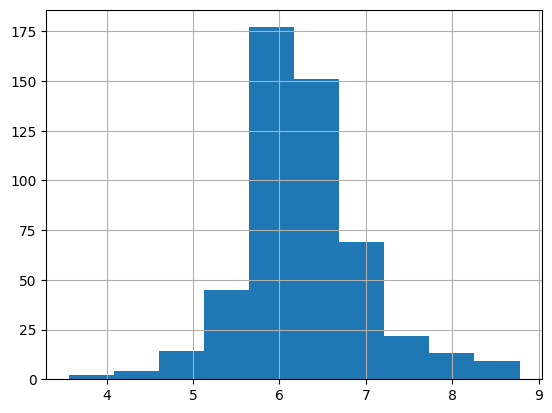

In [ ]:
boston_df['RM'].hist()

In [ ]:
# b1: tìm khoảng được coi là bình thường
mean = boston_df['RM'].mean()
std = boston_df['RM'].std()
upper = mean + 3*std
lower = mean - 3*std

In [ ]:
print(mean)
print(std)
print(upper)
print(lower)

6.284634387351779
0.7026171434153233
8.392485817597748
4.176782957105809


In [ ]:
# b2: tìm những giá trị nằm ngoài khoảng bình thường
boston_df[(boston_df['RM'] < lower) | (boston_df['RM'] > upper)][['RM']]

,RM
225,8.725
257,8.704
262,8.398
364,8.780
365,3.561
367,3.863
374,4.138
406,4.138


In [ ]:
boston_df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [ ]:
# bỏ giá trị ngoại lai
# chả làm gì

# tiền xử lý dữ liệu
# =>
# phân tích, dự đoán, mô hình
# => tiền xử lý -> bỏ đi

## Xác định giá trị ngoại lai bằng IQR

In [ ]:
# CRIM

In [ ]:
# bước 1: tìm khoảng bình thường
Q3 = boston_df['CRIM'].quantile(0.75)
Q1 = boston_df['CRIM'].quantile(0.25)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

In [ ]:
print(IQR)
print(upper)
print(lower)

3.5950375
9.06963875
-5.31051125


In [ ]:
# bước 2: tìm giá trị nằm ngoài khoảng bình thường -> ngoại lai
# CRIM
boston_df[(boston_df['CRIM'] < lower) | (boston_df['CRIM'] > upper)][['CRIM']]

,CRIM
367,13.5222
371,9.2323
373,11.1081
374,18.4982
375,19.6091
...,...
468,15.5757
469,13.0751
477,15.0234
478,10.2330


In [ ]:
# bỏ đi -> mất dữ liệu ở những địa điểm có tỷ lệ tội phạm cao ở thành phố boston -> .drop
# tách dữ liệu
  # df1: nơi không bị outlier ở crime -> tỷ lệ tội phạm nằm trong ngưỡng bình thường  -> lọc df[điều kiện]
  # df2: nơi có outlier ở crime -> tỷ lệ tội phạm cao hẳn -> lọc df[điều kiện]

In [ ]:
# tìm giá trị ngoại lai -> từng cột
# nhìn từng cột -> phân tích ngoại lai ...

# không nên áp cho toàn bộ bảng

# chọn cột mình quan tâm -> nhỏ hơn 15 cột

In [ ]:
# Ngoại lai (Outliers)

# Xác định có outlier không -> Vẽ xem có không? không
# Có -> Tìm ra giá trị nào, ở vị trí nào, trông làm sao
  # bước 1: tìm ra cái khoảng bình thường
    # trung bình (normal distribution) -> độ lệch chuẩn (zscore) -> (mean - 3*std, mean + 3*std)
    # trung vị (không normal) -> iqr -> (q1-1.5*iqr, q3+1.5*iqr)
  # bước 2: tìm giá trị nằm ngoài khoảng bình thường
    # hoặc nhỏ hơn mean-3*std, hoặc lớn hơn mean + 3*std
    # hoặc nhỏ hơn q1 - 1.5*iqr, hoặc lơn hơn q3 + 1.5*iqr

# Xử lý
  # bỏ đi
  # để yên
  # tách thành 2 phần rồi phân tích riêng

# Lưu ý: tìm outlier ở từng cột
  # vì sao không nên áp vào toàn bộ bảng
    # 1. mỗi cột có tỷ lệ phân bổ giá trị khác nhau
    # 2. khoảng dữ liệu ở các cột khác nhau: thu nhập: 1 triệu - 100 triệu; tuổi: 18 - 60 tuổi (chục)
    # -> mất thông tin
  # lưu ý 2: chọn ra cột muốnphana tích dựa trên yêu cầu bài toán trước khi đi vào tiền xử lý...

# Chuẩn hoá dữ liệu

Dự đoán: Phân nhóm, phân cụm khách hàng -> sử dụng khoảng cách giữa cách điểm dữ liệu để phân cụm

Dự đoán cái gì đó -> chuẩn hoá

Phân tích (Descriptive Statistics): không chuẩn hoá

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

<Axes: >

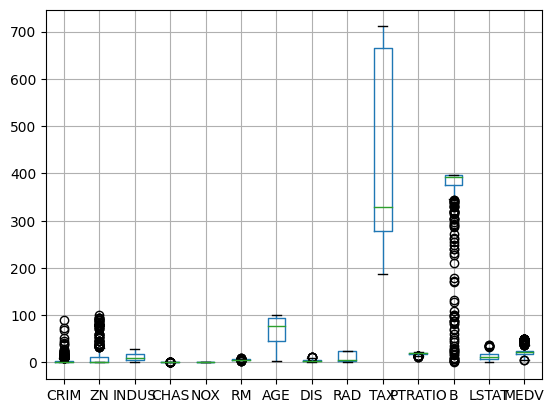

In [ ]:
boston_df.boxplot()

In [ ]:
# khai báo phương pháp chuẩn hoá: StandardScaler()
# áp phương pháp đấy vào tập dữ liệu: .fit_transform(boston_df)

In [ ]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Standard Scaling (Z-score Scaling)

In [ ]:
# khai báo phương pháp
s_scaler = StandardScaler()

# áp phương pháp vào tập dữ liệu
df_s = s_scaler.fit_transform(boston_df)

In [ ]:
# đưa lại về dạng bảng
# chỉ định tên cột
colnames = list(boston_df.columns)
df_s = pd.DataFrame(df_s, columns=colnames)
df_s

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,-0.057989


<Axes: >

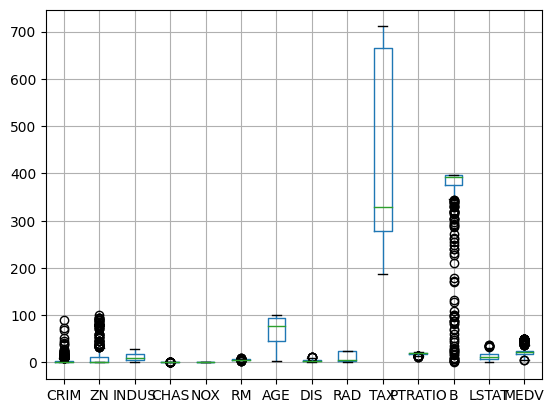

In [ ]:
boston_df.boxplot()

<Axes: >

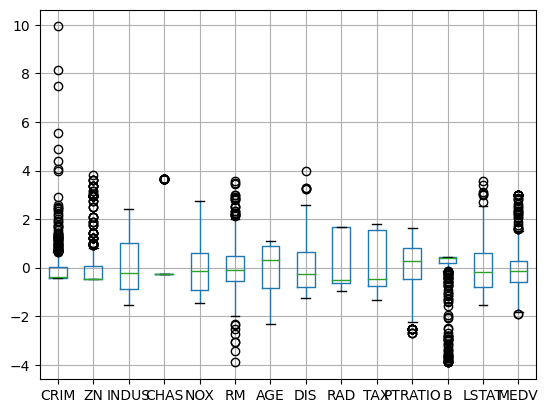

In [ ]:
df_s.boxplot()

## Min Max Scaling

In [ ]:
# khai báo phương pháp
minmax_scaler = MinMaxScaler()

# áp phong pháp vão tâp dû liêu
df_m = minmax_scaler.fit_transform(boston_df)

# đưa lại về dạng bảng
df_m = pd.DataFrame(df_m, columns=colnames)
df_m

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778


<Axes: >

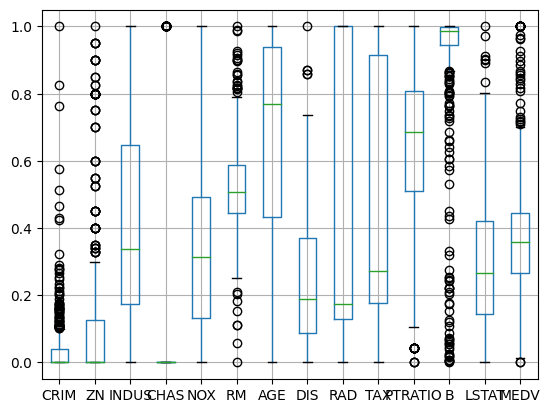

In [ ]:
df_m.boxplot()

## Robust Scaling

In [ ]:
# khai báo phương pháp
robust_scaler = RobustScaler()

# áp phương pháp vào tập DL
df_r = robust_scaler.fit_transform(boston_df)

# đưa lại về dạng bảng
df_r = pd.DataFrame(df_r, columns=colnames)
df_r

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313


<Axes: >

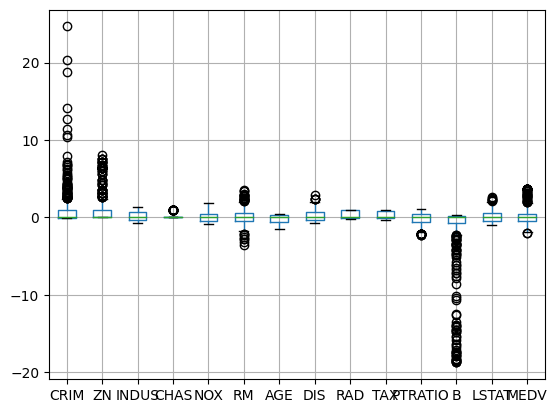

In [ ]:
df_r.boxplot()

In [ ]:
# Thao tác dữ liệu

# LÀM SẠCH DỮ LIỆU

# CÁC PHƯƠNG PHÁP CHUẨN HOÁ DỮ LIỆU

# BÀI TẬP VỀ NHÀ: THỨ 3 -> DEADLINE: THỨ 3 TUẦN SAU - BÀI TẬP CỦA TIỀN XỬ LÝ DỮ LIỆU 1.

# dinhthuytien2112@gmail.com